# Project: Investigate a Dataset (tmdb Dataset)

## Table of Contents
1.Introductiion
2.Data Wrangling.
3.Exploratory Data Analysis
4.Conclsion

## Introduction
1. TMDB Dataset to explore data based on Genre,Year and other relevant columns to determine:
a.which genre are the most sort after.
b.Which decade made the most.


In [83]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



## Data Wrangling

In [84]:
tmdb=pd.read_csv('tmdb_5000_movies.csv')

Checking information of the dataset for inconsistencies,missing,messy cell value nad 

In [85]:
tmdb.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


###### CHECKING INFORMATION AS PER COLUMN

In [86]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [87]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### Observations for cleaning data
i.Create a column for year from the release_date column
ii. Seperate genres in different Columns.
iii.Create a column for years by the decade.

CREATING THE YEAR COLUMN FROM THE RELEASE DATE

In [88]:
tmdb['Year']=tmdb['release_date'].str[0:4]

In [89]:
type(tmdb.Year.shape[0])

int

exploring the budget and revenue by year


In [90]:
tmdb.groupby('Year')['budget','revenue'].sum()

C:\Users\Worldclass 3\AppData\Local\Temp\ipykernel_16324\3542890207.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tmdb.groupby('Year')['budget','revenue'].sum()


,budget,revenue
Year,,
1916,385907,8394751
1925,245000,22000000
1927,92620000,650422
1929,379000,4358000
1930,3950000,8000000
...,...,...
2013,8205880834,23411493295
2014,7368453311,24120490589
2015,6724547367,22775024221


## Seperating columns based on specific genre

In [91]:
tmdb['Adventure']=tmdb['genres'].apply(lambda x: 'Adventure,' if 'Adventure' in x else '' )
tmdb['Animation']=tmdb['genres'].apply(lambda x: 'Animation,' if 'Animation' in x else '' )
tmdb['Comedy']=tmdb['genres'].apply(lambda x: 'Comedy,' if 'Comedy' in x else '' )
tmdb['Crime']=tmdb['genres'].apply(lambda x: 'Crime,' if 'Crime' in x else '' )
tmdb['Documentary']=tmdb['genres'].apply(lambda x: 'Documentary,' if 'Documentary' in x else '' )
tmdb['Drama']=tmdb['genres'].apply(lambda x: 'Drama,' if 'Drama' in x else '' )
tmdb['Fantasy']=tmdb['genres'].apply(lambda x: 'Fantasy,' if 'Action' in x else '' )
tmdb['History']=tmdb['genres'].apply(lambda x: 'History,' if 'History' in x else '' )
tmdb['Horror']=tmdb['genres'].apply(lambda x: 'Horror,' if 'Horror' in x else '' )
tmdb['Music']=tmdb['genres'].apply(lambda x: 'Music,' if 'Music' in x else '' )
tmdb['Mystery']=tmdb['genres'].apply(lambda x: 'Mystery,' if 'Mystery' in x else '' )
tmdb['Romance']=tmdb['genres'].apply(lambda x: 'Romance,' if 'Romance' in x else '' )
tmdb['Sci_Fi']=tmdb['genres'].apply(lambda x: 'Sci_Fi,' if 'Science Fiction' in x else '' )
tmdb['Thriller']=tmdb['genres'].apply(lambda x: 'Thriller,' if 'Thriller' in x else '' )
tmdb['War']=tmdb['genres'].apply(lambda x: 'War' if 'War' in x else '' )
tmdb['Western']=tmdb['genres'].apply(lambda x: 'Western,' if 'Western' in x else '' )
tmdb['TV Movie']=tmdb['genres'].apply(lambda x: 'TV Movie,' if 'TV Movie' in x else '' )


In [92]:
tmdb['Action']=tmdb['genres'].apply(lambda x: 'Action,' if 'Action' in x else '' )

Genres have been sepereated based on appropriate columns

###### Checking new columns created

In [93]:
tmdb.iloc[:,30:]

,Music,Mystery,Romance,Sci_Fi,Thriller,War,Western,TV Movie,Action
0,,,,"Sci_Fi,",,,,,"Action,"
1,,,,,,,,,"Action,"
2,,,,,,,,,"Action,"
3,,,,,"Thriller,",,,,"Action,"
4,,,,"Sci_Fi,",,,,,"Action,"
...,...,...,...,...,...,...,...,...,...
4798,,,,,"Thriller,",,,,"Action,"
4799,,,"Romance,",,,,,,
4800,,,"Romance,",,,,,"TV Movie,",
4801,,,,,,,,,


##### CREATE A NUMBERICAL COLUMN BASED ON GENRE OF THE MOVIE

In [94]:
tmdb['Actioncount']=tmdb['genres'].apply(lambda x: 1 if 'Adventure' in x else 0 )
tmdb['Adventurecount']=tmdb['genres'].apply(lambda x: 1 if 'Adventure' in x else 0 )
tmdb['Animationcount']=tmdb['genres'].apply(lambda x: 1 if 'Animation' in x else 0 )
tmdb['Comedycount']=tmdb['genres'].apply(lambda x: 1 if 'Comedy' in x else 0 )
tmdb['Crimecount']=tmdb['genres'].apply(lambda x: 1 if 'Crime' in x else 0 )
tmdb['Documentarycount']=tmdb['genres'].apply(lambda x: 1 if 'Documentary' in x else 0 )
tmdb['Dramacount']=tmdb['genres'].apply(lambda x: 1 if 'Drama' in x else 0 )
tmdb['Fantasycount']=tmdb['genres'].apply(lambda x: 1 if 'Action' in x else 0 )
tmdb['Historycount']=tmdb['genres'].apply(lambda x: 1 if 'History' in x else 0 )
tmdb['Horrorcount']=tmdb['genres'].apply(lambda x: 1 if 'Horror' in x else 0 )
tmdb['Musiccount']=tmdb['genres'].apply(lambda x: 1 if 'Music' in x else 0 )
tmdb['Mysterycount']=tmdb['genres'].apply(lambda x: 1 if 'Mystery' in x else 0 )
tmdb['Romancecount']=tmdb['genres'].apply(lambda x: 1 if 'Romance' in x else 0 )
tmdb['Sci_Ficount']=tmdb['genres'].apply(lambda x: 1 if 'Science Fiction' in x else 0 )
tmdb['Thrillercount']=tmdb['genres'].apply(lambda x: 1 if 'Thriller' in x else 0 )
tmdb['Warcount']=tmdb['genres'].apply(lambda x: 1 if 'War' in x else 0 )
tmdb['Westerncount']=tmdb['genres'].apply(lambda x: 1 if 'Western' in x else 0 )
tmdb['TV Moviecount']=tmdb['genres'].apply(lambda x: 1 if 'TV Movie' in x else 0 )

Numerical columns have been created for Statistical operation of the data

##### To get the movie summary by decade`, we first convert all cell values to integer

In [95]:
tmdb.Year=pd.to_numeric(tmdb.Year)

In [96]:
tmdb['Decade']=pd.cut(tmdb['Year'],bins=[0,1919,1929,1939,1949,1959,1969,1979,1989,1999,2009,2019],labels=['10s','20s','30s','40s','50s','60s','70s','80s','90s','2000s','2010s'])
#Years are grouped into decades


## Exploratory Data Analysis


### Research Question 1 (Replace this header name!)

#### Most Numbers of Genre type in the dataset are:
i.  Drama          2297
ii. Comedy         1722
iii.Thriller       1274

In [97]:
tmdb.iloc[:,43:56].sum()

Crimecount           696
Documentarycount     110
Dramacount          2297
Fantasycount        1154
Historycount         197
Horrorcount          519
Musiccount           185
Mysterycount         348
Romancecount         894
Sci_Ficount          535
Thrillercount       1274
Warcount             144
Westerncount          82
dtype: int64

## Questions  
Which Genre are the most profitable?
Which Genre are the least profitable?
Which Genre is the Most popular?
Which Decade is the most Profitable?

In [98]:
#summarize by the Decade
#This creates a column for the profit made by 
tmdb['Profit']=tmdb['revenue']-tmdb['budget']



#### Visualization of Profit in correlation to Revenue and Budget

<AxesSubplot:xlabel='revenue', ylabel='Profit'>

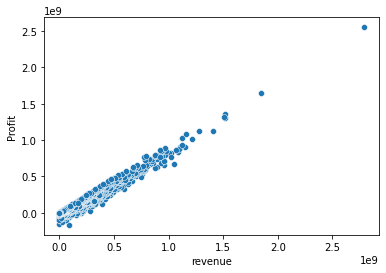

In [99]:
sns.scatterplot(x='revenue',y='Profit',data=tmdb)

Explanatory Note:There is a strong positive relationship between the Revenue and Profit

<AxesSubplot:xlabel='budget', ylabel='Profit'>

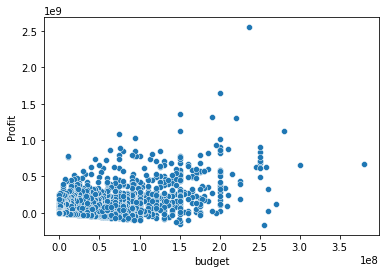

In [100]:
sns.scatterplot(x='budget',y='Profit',data=tmdb)

Explanatory note:There is no positive relationship between the profit and budget

<AxesSubplot:xlabel='budget', ylabel='revenue'>

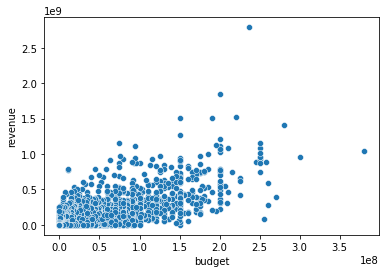

In [101]:
sns.scatterplot(x='budget',y='revenue',data=tmdb)

Explanatory note:There is no positive relationship between the revenue and budget

#### Summary by the Decade

In [102]:
Decadeprofit=tmdb.groupby('Decade',as_index=False)['revenue','budget','Profit'].sum()

C:\Users\Worldclass 3\AppData\Local\Temp\ipykernel_16324\1368385059.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Decadeprofit=tmdb.groupby('Decade',as_index=False)['revenue','budget','Profit'].sum()


In [103]:
Decadeprofit.sort_values('Profit',ascending=False)

,Decade,revenue,budget,Profit
10,2010s,149775371227,49831499062,99943872165
9,2000s,156602186639,62409076376,94193110263
8,90s,61301228838,22304952481,38996276357
7,80s,16963368503,3607927523,13355440980
6,70s,6543658156,763891740,5779766416
5,60s,2228628931,354340835,1874288096
2,30s,671309038,20133164,651175874
3,40s,592750774,45932000,546818774
4,50s,383942165,71943433,311998732
0,10s,8394751,385907,8008844


### The decade with the most profit is 2010-2017

### Exploratory Data Analysis

###### PROFIT BY DECADE

##### Plot Summary of Profit by Decade

[Text(0.5, 1.0, 'Profit per Decade')]

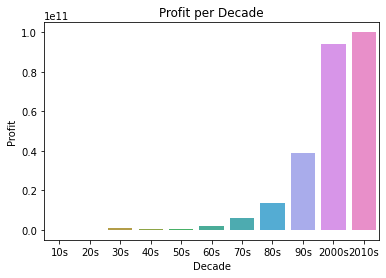

In [104]:
sns.barplot(x='Decade',y='Profit',data=Decadeprofit,).set(title='Profit per Decade')

Note:Profit has increased as the decade go by,More profit is being made from movies

### Total summary of Action movie genre by Year

In [105]:
actionsum=tmdb.groupby('Decade')['Actioncount'].sum()

In [106]:
actionsum

Decade
10s        0
20s        0
30s        3
40s        1
50s        3
60s       14
70s       29
80s       75
90s      127
2000s    320
2010s    218
Name: Actioncount, dtype: int64

General summary of Action Movies over the years

Exploration of the Action Genre

<AxesSubplot:title={'center':'Action Movies per Decade'}, xlabel='Decade', ylabel='Movie Count'>

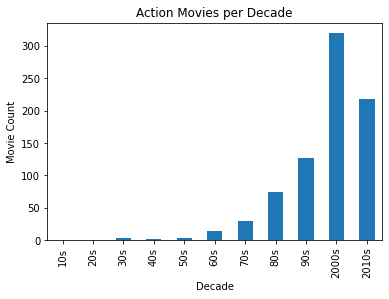

In [107]:
actionsum.plot(x='Decade',y='Actioncount',kind='bar',title='Action Movies per Decade',ylabel='Movie Count',xlabel='Decade')

#### MOVIE COUNT BY GENRE AND DECADE

In [108]:
moviecount=tmdb.groupby('Decade',as_index=False)['Adventurecount','Actioncount','Dramacount','Fantasycount','Historycount','Horrorcount','Musiccount','Mysterycount','Romancecount','Sci_Ficount','Thrillercount','Westerncount','TV Moviecount'].sum()

#creates total sum of movie genre per decade

C:\Users\Worldclass 3\AppData\Local\Temp\ipykernel_16324\546733720.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  moviecount=tmdb.groupby('Decade',as_index=False)['Adventurecount','Actioncount','Dramacount','Fantasycount','Historycount','Horrorcount','Musiccount','Mysterycount','Romancecount','Sci_Ficount','Thrillercount','Westerncount','TV Moviecount'].sum()


In [109]:
moviecount

,Decade,Adventurecount,Actioncount,Dramacount,Fantasycount,Historycount,Horrorcount,Musiccount,Mysterycount,Romancecount,Sci_Ficount,Thrillercount,Westerncount,TV Moviecount
0,10s,0,0,1,0,0,0,0,0,0,0,0,0,0
1,20s,0,0,4,0,0,0,1,0,3,1,1,0,0
2,30s,3,3,8,2,1,0,3,0,8,0,0,0,0
3,40s,1,1,16,2,2,0,4,4,8,0,2,3,0
4,50s,3,3,20,4,4,1,4,1,10,2,2,3,0
5,60s,14,14,42,17,12,5,8,6,13,5,15,11,1
6,70s,29,29,49,33,7,15,9,5,16,27,26,4,0
7,80s,75,75,100,84,17,59,12,11,37,55,71,9,0
8,90s,127,127,396,200,27,67,20,71,168,92,225,10,0
9,2000s,320,320,1015,467,77,189,80,163,436,194,536,20,2


Movie count per Decade and Genre

##### MOVIES PLOT BY GENRE AND DECADE

<AxesSubplot:title={'center':'Movies Genre Released per Decade'}, xlabel='Decade', ylabel='Movie Count'>

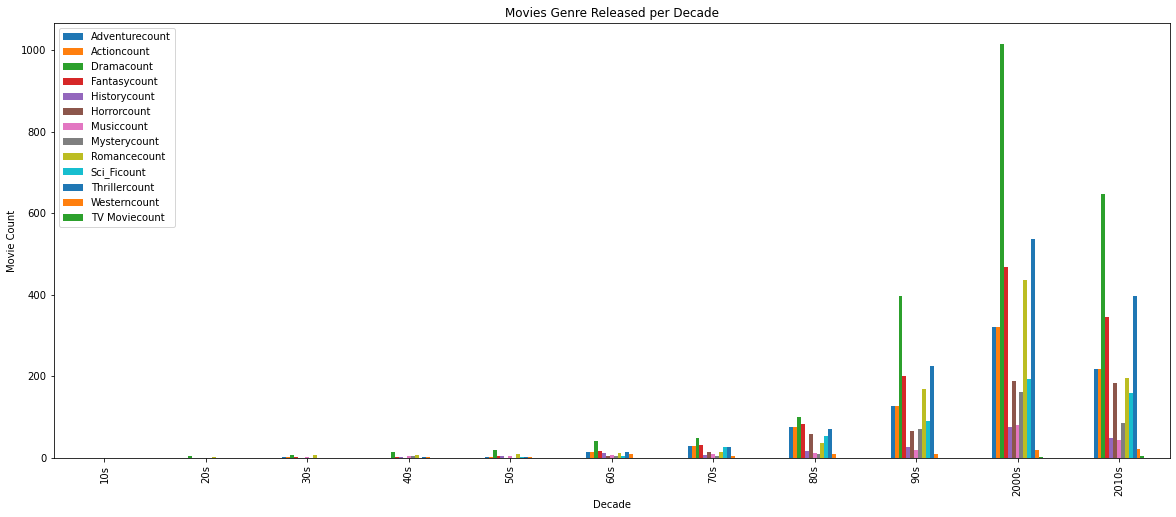

In [110]:
moviecount.plot(x='Decade',y=['Adventurecount','Actioncount','Dramacount','Fantasycount','Historycount','Horrorcount','Musiccount','Mysterycount','Romancecount','Sci_Ficount','Thrillercount','Westerncount','TV Moviecount'],kind='bar',figsize=(20,8),title='Movies Genre Released per Decade',ylabel='Movie Count',xlabel='Decade')

##### Summary of Profit by the Decade

In [111]:
profiting=tmdb.groupby('Decade',as_index=False)['revenue','budget','Profit'].sum()

C:\Users\Worldclass 3\AppData\Local\Temp\ipykernel_16324\4266082735.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  profiting=tmdb.groupby('Decade',as_index=False)['revenue','budget','Profit'].sum()


In [112]:
profiting

,Decade,revenue,budget,Profit
0,10s,8394751,385907,8008844
1,20s,27008422,93244000,-66235578
2,30s,671309038,20133164,651175874
3,40s,592750774,45932000,546818774
4,50s,383942165,71943433,311998732
5,60s,2228628931,354340835,1874288096
6,70s,6543658156,763891740,5779766416
7,80s,16963368503,3607927523,13355440980
8,90s,61301228838,22304952481,38996276357
9,2000s,156602186639,62409076376,94193110263


Explanatory Note:This is a summary of the budget,revenue and profit made by the decade

In [113]:
tmdb.iloc[:,39:56].sum()

Actioncount          790
Adventurecount       790
Animationcount       234
Comedycount         1722
Crimecount           696
Documentarycount     110
Dramacount          2297
Fantasycount        1154
Historycount         197
Horrorcount          519
Musiccount           185
Mysterycount         348
Romancecount         894
Sci_Ficount          535
Thrillercount       1274
Warcount             144
Westerncount          82
dtype: int64

Movie counts per Genre

##### TO GET THE PROFITABILITY PER GENRE

In [114]:
Adventureprofit=tmdb[tmdb['Adventure']=='Adventure,']['Profit'].sum(),
Actionprofit=tmdb[tmdb['Action']=='Action,']['Profit'].sum(),
Dramaprofit=tmdb[tmdb['Drama']=='Drama,']['Profit'].sum(),
Animationprofit=tmdb[tmdb['Animation']=='Animation,']['Profit'].sum(),
Comedyprofit=tmdb[tmdb['Comedy']=='Comedy,']['Profit'].sum(),
Crimeprofit=tmdb[tmdb['Crime']=='Crime,']['Profit'].sum(),
Documentaryprofit=tmdb[tmdb['Documentary']=='Documentary,']['Profit'].sum(),
Fantasyprofit=tmdb[tmdb['Fantasy']=='Fantasy,']['Profit'].sum(),
Historyprofit=tmdb[tmdb['History']=='History,']['Profit'].sum(),
Horrorprofit=tmdb[tmdb['Horror']=='Horror,']['Profit'].sum(),
Musicprofit=tmdb[tmdb['Music']=='Music,']['Profit'].sum(),
Mysteryprofit=tmdb[tmdb['Mystery']=='Mystery,']['Profit'].sum(),
Romanceprofit=tmdb[tmdb['Romance']=='Romance,']['Profit'].sum(),
Sci_Fiprofit=tmdb[tmdb['Sci_Ficount']==1]['Profit'].sum(),
Thrillerprofit=tmdb[tmdb['Thriller']=='Thriller,']['Profit'].sum(),
Westernprofit=tmdb[tmdb['Western']=='Western,']['Profit'].sum(),
TVMovieprofit=tmdb[tmdb['TV Movie']=='TV Movie,']['Profit'].sum(),
Warprofit=tmdb[tmdb['War']=='War']['Profit'].sum(),

#creates the total profit per genre

In [115]:
Profitsummary=pd.DataFrame(index=['Adventure','Action','Drama','Animation','Comedy','Crime','Documentary','Fantasy','History','Horror','Music','Mystery','Romance','Sci_Fi','Thriller','Western','TV Movie','War'],
                           data=[Adventureprofit,Actionprofit,Dramaprofit,Animationprofit,Comedyprofit,Crimeprofit,Documentaryprofit,Fantasyprofit,Historyprofit,Horrorprofit,Musicprofit,Mysteryprofit,Romanceprofit,Sci_Fiprofit,Thrillerprofit,Westernprofit,TVMovieprofit,Warprofit]
                           ,columns=['Total Profit'])

Creating a table for total Profit per genre

##### TOTAL SUMMARY OF EACH MOVIE PROFIT BY GENRE

In [116]:
Profitsummary.sort_values('Total Profit',ascending=False)

,Total Profit
Adventure,112443341088
Fantasy,103516507916
Action,103516507916
Comedy,79170805799
Drama,72212871827
Thriller,62522930845
Sci_Fi,53816165880
Animation,37259146809
Romance,35483779802
Crime,26657394212


Explanatory Note:sum total of profit made per genre

##### CONCLUSION
1.The Dataset was thoroughly cleaned to aid in analysis
2.I have summarized all the movieset based on profit per genre and the total number of movies per genre.
3.I have visualized the genre type as per number of movies released per year/genre.


## CONCLUSION ii

1.The Most profitable Movie genre are Adventure,Action and Drama.
2.The Most popular genres are Drama,Fantasy and Action according to the dataset
3.The least profitable genre are TV Movies,Documentary and Western.
4.To make more profit genre type should be considered.
5.Changes in year and time tend to affect some movie genre, there was a sharp decline in Romance movies from 2000s to 2010s.


### Limitation
1.The graph can not be plotted clearly because of the numerous genre sometimes making figures too small.

